In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ETC-USD
Start: 2021-01-22 17:30:00+00:00, End: 2021-03-22 15:00:00+00:00
Training data: 1367 
Tsesting data: 1368 


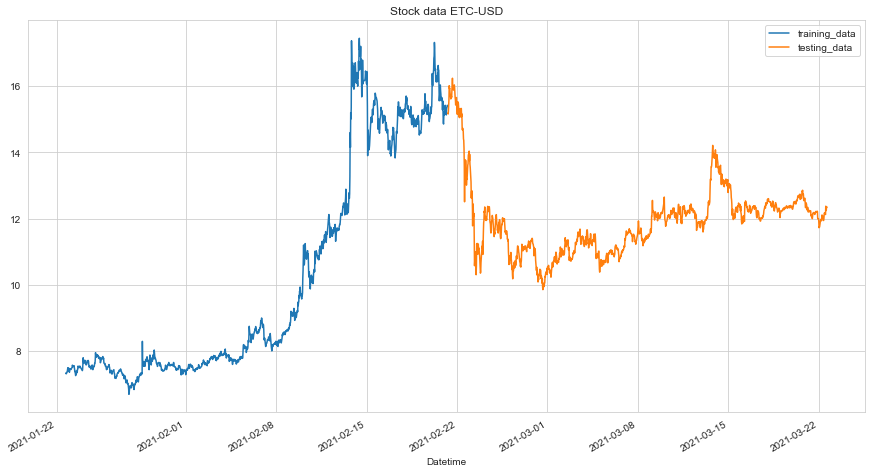

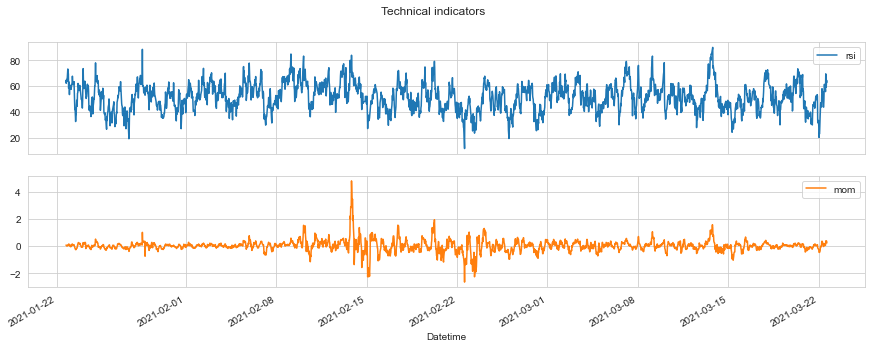

In [2]:
stock_name = 'etc-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1490.65, duration: 0:00:00.268054
episode: 2/2000, episode end value: 1490.74, duration: 0:00:00.225053
episode: 3/2000, episode end value: 1432.32, duration: 0:00:00.222045
episode: 4/2000, episode end value: 1575.12, duration: 0:00:00.212053
episode: 5/2000, episode end value: 1434.52, duration: 0:00:00.219043
episode: 6/2000, episode end value: 1412.35, duration: 0:00:00.205048
episode: 7/2000, episode end value: 1441.59, duration: 0:00:00.218051
episode: 8/2000, episode end value: 1463.28, duration: 0:00:00.209045
episode: 9/2000, episode end value: 1425.99, duration: 0:00:00.215046
episode: 10/2000, episode end value: 1422.11, duration: 0:00:00.230054
episode: 11/2000, episode end value: 1412.27, duration: 0:00:00.205044
episode: 12/2000, episode end value: 1504.96, duration: 0:00:00.217047
episode: 13/2000, episode end value: 1505.21, duration: 0:00:00.240052
episode: 14/2000, episode end value: 1426.33, duration: 0:00:00.210049
episode: 15/200

episode: 117/2000, episode end value: 1433.34, duration: 0:00:00.263061
episode: 118/2000, episode end value: 1396.56, duration: 0:00:00.272057
episode: 119/2000, episode end value: 1413.14, duration: 0:00:00.251056
episode: 120/2000, episode end value: 1510.37, duration: 0:00:00.271062
episode: 121/2000, episode end value: 1403.65, duration: 0:00:00.266061
episode: 122/2000, episode end value: 1430.98, duration: 0:00:00.253054
episode: 123/2000, episode end value: 1401.13, duration: 0:00:00.242057
episode: 124/2000, episode end value: 1409.56, duration: 0:00:00.231049
episode: 125/2000, episode end value: 1495.02, duration: 0:00:00.267061
episode: 126/2000, episode end value: 1434.95, duration: 0:00:00.250053
episode: 127/2000, episode end value: 1425.37, duration: 0:00:00.243055
episode: 128/2000, episode end value: 1399.10, duration: 0:00:00.217049
episode: 129/2000, episode end value: 1432.03, duration: 0:00:00.213044
episode: 130/2000, episode end value: 1433.96, duration: 0:00:00

episode: 231/2000, episode end value: 1435.06, duration: 0:00:00.252061
episode: 232/2000, episode end value: 1405.22, duration: 0:00:00.234049
episode: 233/2000, episode end value: 1462.87, duration: 0:00:00.236053
episode: 234/2000, episode end value: 1405.44, duration: 0:00:00.240053
episode: 235/2000, episode end value: 1419.29, duration: 0:00:00.222051
episode: 236/2000, episode end value: 1425.40, duration: 0:00:00.222050
episode: 237/2000, episode end value: 1386.61, duration: 0:00:00.222051
episode: 238/2000, episode end value: 1391.70, duration: 0:00:00.223050
episode: 239/2000, episode end value: 1445.32, duration: 0:00:00.240055
episode: 240/2000, episode end value: 1462.22, duration: 0:00:00.238052
episode: 241/2000, episode end value: 1405.11, duration: 0:00:00.237052
episode: 242/2000, episode end value: 1418.01, duration: 0:00:00.238058
episode: 243/2000, episode end value: 1401.88, duration: 0:00:00.225053
episode: 244/2000, episode end value: 1439.80, duration: 0:00:00

episode: 345/2000, episode end value: 1407.33, duration: 0:00:00.283662
episode: 346/2000, episode end value: 1593.23, duration: 0:00:00.282066
episode: 347/2000, episode end value: 1404.37, duration: 0:00:00.279061
episode: 348/2000, episode end value: 1480.07, duration: 0:00:00.312072
episode: 349/2000, episode end value: 1544.75, duration: 0:00:00.339076
episode: 350/2000, episode end value: 1385.77, duration: 0:00:00.297065
episode: 351/2000, episode end value: 1416.96, duration: 0:00:00.303072
episode: 352/2000, episode end value: 1409.72, duration: 0:00:00.307069
episode: 353/2000, episode end value: 1443.10, duration: 0:00:00.296068
episode: 354/2000, episode end value: 1409.86, duration: 0:00:00.288062
episode: 355/2000, episode end value: 1605.82, duration: 0:00:00.327070
episode: 356/2000, episode end value: 1547.64, duration: 0:00:00.308071
episode: 357/2000, episode end value: 1501.03, duration: 0:00:00.303068
episode: 358/2000, episode end value: 1442.57, duration: 0:00:00

episode: 459/2000, episode end value: 1416.20, duration: 0:00:00.278065
episode: 460/2000, episode end value: 1410.30, duration: 0:00:00.302071
episode: 461/2000, episode end value: 1421.17, duration: 0:00:00.288066
episode: 462/2000, episode end value: 1416.83, duration: 0:00:00.336071
episode: 463/2000, episode end value: 1457.22, duration: 0:00:00.302066
episode: 464/2000, episode end value: 1473.22, duration: 0:00:00.294064
episode: 465/2000, episode end value: 1433.43, duration: 0:00:00.314069
episode: 466/2000, episode end value: 1384.21, duration: 0:00:00.288066
episode: 467/2000, episode end value: 1470.04, duration: 0:00:00.301066
episode: 468/2000, episode end value: 1406.65, duration: 0:00:00.280063
episode: 469/2000, episode end value: 1412.41, duration: 0:00:00.295059
episode: 470/2000, episode end value: 1413.18, duration: 0:00:00.276061
episode: 471/2000, episode end value: 1434.70, duration: 0:00:00.296065
episode: 472/2000, episode end value: 1414.04, duration: 0:00:00

episode: 573/2000, episode end value: 1417.01, duration: 0:00:00.292069
episode: 574/2000, episode end value: 1410.81, duration: 0:00:00.250054
episode: 575/2000, episode end value: 1434.74, duration: 0:00:00.269061
episode: 576/2000, episode end value: 1446.00, duration: 0:00:00.290058
episode: 577/2000, episode end value: 1448.11, duration: 0:00:00.284070
episode: 578/2000, episode end value: 1429.11, duration: 0:00:00.246055
episode: 579/2000, episode end value: 1426.83, duration: 0:00:00.277063
episode: 580/2000, episode end value: 1456.51, duration: 0:00:00.275066
episode: 581/2000, episode end value: 1426.88, duration: 0:00:00.306062
episode: 582/2000, episode end value: 1466.28, duration: 0:00:00.287067
episode: 583/2000, episode end value: 1572.95, duration: 0:00:00.291063
episode: 584/2000, episode end value: 1446.69, duration: 0:00:00.287068
episode: 585/2000, episode end value: 1511.47, duration: 0:00:00.286062
episode: 586/2000, episode end value: 1410.30, duration: 0:00:00

episode: 687/2000, episode end value: 1431.55, duration: 0:00:00.282066
episode: 688/2000, episode end value: 1432.70, duration: 0:00:00.276061
episode: 689/2000, episode end value: 1428.01, duration: 0:00:00.290065
episode: 690/2000, episode end value: 1523.13, duration: 0:00:00.282067
episode: 691/2000, episode end value: 1524.83, duration: 0:00:00.314073
episode: 692/2000, episode end value: 1442.68, duration: 0:00:00.277064
episode: 693/2000, episode end value: 1442.47, duration: 0:00:00.278057
episode: 694/2000, episode end value: 1424.95, duration: 0:00:00.255058
episode: 695/2000, episode end value: 1560.20, duration: 0:00:00.282068
episode: 696/2000, episode end value: 1498.15, duration: 0:00:00.301068
episode: 697/2000, episode end value: 1409.69, duration: 0:00:00.273057
episode: 698/2000, episode end value: 1451.44, duration: 0:00:00.251056
episode: 699/2000, episode end value: 1474.85, duration: 0:00:00.281064
episode: 700/2000, episode end value: 1442.48, duration: 0:00:00

episode: 801/2000, episode end value: 1419.72, duration: 0:00:00.284064
episode: 802/2000, episode end value: 1423.72, duration: 0:00:00.280060
episode: 803/2000, episode end value: 1490.90, duration: 0:00:00.294067
episode: 804/2000, episode end value: 1430.01, duration: 0:00:00.292065
episode: 805/2000, episode end value: 1481.79, duration: 0:00:00.263062
episode: 806/2000, episode end value: 1507.80, duration: 0:00:00.262058
episode: 807/2000, episode end value: 1417.13, duration: 0:00:00.301069
episode: 808/2000, episode end value: 1423.28, duration: 0:00:00.269060
episode: 809/2000, episode end value: 1448.15, duration: 0:00:00.281058
episode: 810/2000, episode end value: 1432.29, duration: 0:00:00.269063
episode: 811/2000, episode end value: 1402.37, duration: 0:00:00.317730
episode: 812/2000, episode end value: 1441.68, duration: 0:00:00.307987
episode: 813/2000, episode end value: 1438.64, duration: 0:00:00.276426
episode: 814/2000, episode end value: 1426.54, duration: 0:00:00

episode: 915/2000, episode end value: 1469.86, duration: 0:00:00.266060
episode: 916/2000, episode end value: 1473.33, duration: 0:00:00.289066
episode: 917/2000, episode end value: 1423.25, duration: 0:00:00.264062
episode: 918/2000, episode end value: 1449.31, duration: 0:00:00.321072
episode: 919/2000, episode end value: 1414.73, duration: 0:00:00.292063
episode: 920/2000, episode end value: 1486.41, duration: 0:00:00.269063
episode: 921/2000, episode end value: 1441.04, duration: 0:00:00.300068
episode: 922/2000, episode end value: 1417.72, duration: 0:00:00.272062
episode: 923/2000, episode end value: 1497.70, duration: 0:00:00.280060
episode: 924/2000, episode end value: 1462.63, duration: 0:00:00.266053
episode: 925/2000, episode end value: 1444.26, duration: 0:00:00.295073
episode: 926/2000, episode end value: 1432.38, duration: 0:00:00.277061
episode: 927/2000, episode end value: 1536.23, duration: 0:00:00.282064
episode: 928/2000, episode end value: 1469.35, duration: 0:00:00

episode: 1029/2000, episode end value: 1445.94, duration: 0:00:00.303066
episode: 1030/2000, episode end value: 1439.92, duration: 0:00:00.259057
episode: 1031/2000, episode end value: 1432.58, duration: 0:00:00.283063
episode: 1032/2000, episode end value: 1386.39, duration: 0:00:00.259060
episode: 1033/2000, episode end value: 1456.36, duration: 0:00:00.291067
episode: 1034/2000, episode end value: 1447.02, duration: 0:00:00.283060
episode: 1035/2000, episode end value: 1410.44, duration: 0:00:00.275065
episode: 1036/2000, episode end value: 1457.43, duration: 0:00:00.290066
episode: 1037/2000, episode end value: 1439.49, duration: 0:00:00.265054
episode: 1038/2000, episode end value: 1410.45, duration: 0:00:00.285061
episode: 1039/2000, episode end value: 1446.35, duration: 0:00:00.292067
episode: 1040/2000, episode end value: 1430.86, duration: 0:00:00.285066
episode: 1041/2000, episode end value: 1437.58, duration: 0:00:00.289068
episode: 1042/2000, episode end value: 1412.01, dur

episode: 1142/2000, episode end value: 1394.60, duration: 0:00:00.280067
episode: 1143/2000, episode end value: 1441.73, duration: 0:00:00.280067
episode: 1144/2000, episode end value: 1448.85, duration: 0:00:00.284060
episode: 1145/2000, episode end value: 1425.78, duration: 0:00:00.277066
episode: 1146/2000, episode end value: 1443.04, duration: 0:00:00.270055
episode: 1147/2000, episode end value: 1422.65, duration: 0:00:00.264060
episode: 1148/2000, episode end value: 1417.28, duration: 0:00:00.269063
episode: 1149/2000, episode end value: 1442.27, duration: 0:00:00.284061
episode: 1150/2000, episode end value: 1425.44, duration: 0:00:00.265061
episode: 1151/2000, episode end value: 1429.42, duration: 0:00:00.271060
episode: 1152/2000, episode end value: 1471.95, duration: 0:00:00.271059
episode: 1153/2000, episode end value: 1432.53, duration: 0:00:00.268058
episode: 1154/2000, episode end value: 1381.96, duration: 0:00:00.252063
episode: 1155/2000, episode end value: 1436.64, dur

episode: 1255/2000, episode end value: 1435.03, duration: 0:00:00.469106
episode: 1256/2000, episode end value: 1417.17, duration: 0:00:00.390092
episode: 1257/2000, episode end value: 1451.35, duration: 0:00:00.360074
episode: 1258/2000, episode end value: 1418.73, duration: 0:00:00.356082
episode: 1259/2000, episode end value: 1403.48, duration: 0:00:00.314073
episode: 1260/2000, episode end value: 1465.37, duration: 0:00:00.371085
episode: 1261/2000, episode end value: 1438.59, duration: 0:00:00.314071
episode: 1262/2000, episode end value: 1393.36, duration: 0:00:00.302067
episode: 1263/2000, episode end value: 1538.57, duration: 0:00:00.295066
episode: 1264/2000, episode end value: 1482.21, duration: 0:00:00.315071
episode: 1265/2000, episode end value: 1475.15, duration: 0:00:00.291064
episode: 1266/2000, episode end value: 1431.17, duration: 0:00:00.304071
episode: 1267/2000, episode end value: 1476.99, duration: 0:00:00.290064
episode: 1268/2000, episode end value: 1439.25, dur

episode: 1368/2000, episode end value: 1412.34, duration: 0:00:00.288067
episode: 1369/2000, episode end value: 1432.00, duration: 0:00:00.270056
episode: 1370/2000, episode end value: 1438.96, duration: 0:00:00.275063
episode: 1371/2000, episode end value: 1436.80, duration: 0:00:00.274058
episode: 1372/2000, episode end value: 1441.53, duration: 0:00:00.264060
episode: 1373/2000, episode end value: 1369.53, duration: 0:00:00.269162
episode: 1374/2000, episode end value: 1528.99, duration: 0:00:00.415343
episode: 1375/2000, episode end value: 1466.72, duration: 0:00:00.362085
episode: 1376/2000, episode end value: 1398.30, duration: 0:00:00.270056
episode: 1377/2000, episode end value: 1438.47, duration: 0:00:00.297068
episode: 1378/2000, episode end value: 1410.28, duration: 0:00:00.271065
episode: 1379/2000, episode end value: 1447.71, duration: 0:00:00.284058
episode: 1380/2000, episode end value: 1467.06, duration: 0:00:00.318067
episode: 1381/2000, episode end value: 1427.63, dur

episode: 1481/2000, episode end value: 1393.55, duration: 0:00:00.294067
episode: 1482/2000, episode end value: 1418.70, duration: 0:00:00.329070
episode: 1483/2000, episode end value: 1432.86, duration: 0:00:00.361086
episode: 1484/2000, episode end value: 1430.87, duration: 0:00:00.318119
episode: 1485/2000, episode end value: 1394.96, duration: 0:00:00.274553
episode: 1486/2000, episode end value: 1438.42, duration: 0:00:00.309071
episode: 1487/2000, episode end value: 1405.84, duration: 0:00:00.283133
episode: 1488/2000, episode end value: 1440.27, duration: 0:00:00.279061
episode: 1489/2000, episode end value: 1380.00, duration: 0:00:00.260057
episode: 1490/2000, episode end value: 1515.20, duration: 0:00:00.305070
episode: 1491/2000, episode end value: 1439.24, duration: 0:00:00.320068
episode: 1492/2000, episode end value: 1477.18, duration: 0:00:00.277060
episode: 1493/2000, episode end value: 1452.58, duration: 0:00:00.336078
episode: 1494/2000, episode end value: 1490.59, dur

episode: 1594/2000, episode end value: 1478.34, duration: 0:00:00.287066
episode: 1595/2000, episode end value: 1500.62, duration: 0:00:00.258059
episode: 1596/2000, episode end value: 1453.91, duration: 0:00:00.272064
episode: 1597/2000, episode end value: 1376.11, duration: 0:00:00.253056
episode: 1598/2000, episode end value: 1509.54, duration: 0:00:00.273061
episode: 1599/2000, episode end value: 1496.44, duration: 0:00:00.280059
episode: 1600/2000, episode end value: 1427.48, duration: 0:00:00.263056
episode: 1601/2000, episode end value: 1501.15, duration: 0:00:00.326071
episode: 1602/2000, episode end value: 1427.52, duration: 0:00:00.298071
episode: 1603/2000, episode end value: 1500.16, duration: 0:00:00.266060
episode: 1604/2000, episode end value: 1432.84, duration: 0:00:00.339076
episode: 1605/2000, episode end value: 1497.84, duration: 0:00:00.312073
episode: 1606/2000, episode end value: 1501.48, duration: 0:00:00.340074
episode: 1607/2000, episode end value: 1451.87, dur

episode: 1707/2000, episode end value: 1466.96, duration: 0:00:00.331076
episode: 1708/2000, episode end value: 1415.90, duration: 0:00:00.258059
episode: 1709/2000, episode end value: 1443.06, duration: 0:00:00.278063
episode: 1710/2000, episode end value: 1537.74, duration: 0:00:00.295067
episode: 1711/2000, episode end value: 1467.53, duration: 0:00:00.317070
episode: 1712/2000, episode end value: 1528.07, duration: 0:00:00.323073
episode: 1713/2000, episode end value: 1450.13, duration: 0:00:00.268061
episode: 1714/2000, episode end value: 1431.36, duration: 0:00:00.306069
episode: 1715/2000, episode end value: 1391.43, duration: 0:00:00.359084
episode: 1716/2000, episode end value: 1451.21, duration: 0:00:00.373078
episode: 1717/2000, episode end value: 1382.12, duration: 0:00:00.350075
episode: 1718/2000, episode end value: 1457.66, duration: 0:00:00.338077
episode: 1719/2000, episode end value: 1439.85, duration: 0:00:00.311070
episode: 1720/2000, episode end value: 1408.77, dur

episode: 1820/2000, episode end value: 1429.91, duration: 0:00:00.280060
episode: 1821/2000, episode end value: 1407.50, duration: 0:00:00.267062
episode: 1822/2000, episode end value: 1485.28, duration: 0:00:00.290064
episode: 1823/2000, episode end value: 1436.08, duration: 0:00:00.302525
episode: 1824/2000, episode end value: 1423.44, duration: 0:00:00.358392
episode: 1825/2000, episode end value: 1424.25, duration: 0:00:00.396085
episode: 1826/2000, episode end value: 1473.95, duration: 0:00:00.327075
episode: 1827/2000, episode end value: 1517.37, duration: 0:00:00.346078
episode: 1828/2000, episode end value: 1553.44, duration: 0:00:00.307070
episode: 1829/2000, episode end value: 1402.26, duration: 0:00:00.273061
episode: 1830/2000, episode end value: 1464.85, duration: 0:00:00.270059
episode: 1831/2000, episode end value: 1439.55, duration: 0:00:00.265063
episode: 1832/2000, episode end value: 1496.93, duration: 0:00:00.278061
episode: 1833/2000, episode end value: 1551.92, dur

episode: 1933/2000, episode end value: 1441.96, duration: 0:00:00.315073
episode: 1934/2000, episode end value: 1437.50, duration: 0:00:00.267057
episode: 1935/2000, episode end value: 1396.19, duration: 0:00:00.254062
episode: 1936/2000, episode end value: 1447.88, duration: 0:00:00.328548
episode: 1937/2000, episode end value: 1465.46, duration: 0:00:00.277700
episode: 1938/2000, episode end value: 1386.70, duration: 0:00:00.250843
episode: 1939/2000, episode end value: 1381.41, duration: 0:00:00.235052
episode: 1940/2000, episode end value: 1439.08, duration: 0:00:00.231056
episode: 1941/2000, episode end value: 1496.83, duration: 0:00:00.274061
episode: 1942/2000, episode end value: 1463.14, duration: 0:00:00.298068
episode: 1943/2000, episode end value: 1406.78, duration: 0:00:00.250056
episode: 1944/2000, episode end value: 1591.51, duration: 0:00:00.264056
episode: 1945/2000, episode end value: 1446.22, duration: 0:00:00.249057
episode: 1946/2000, episode end value: 1452.33, dur

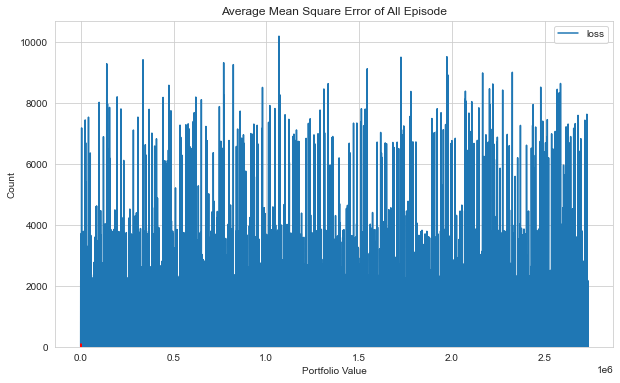

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

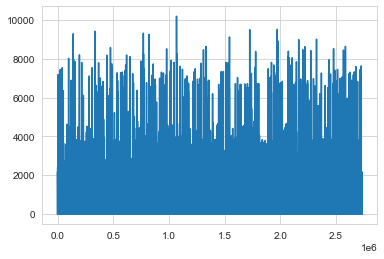

In [5]:
plt.plot(agent.model.losses)

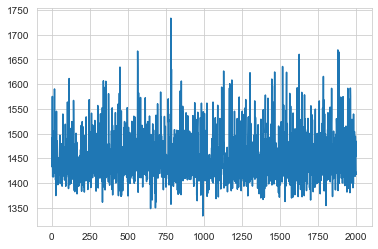

In [6]:
plt.plot(portfolio_value)

episode end value: 1056.99, duration: 0:00:00.097020
Sell: 0 times, Buy: 1 times


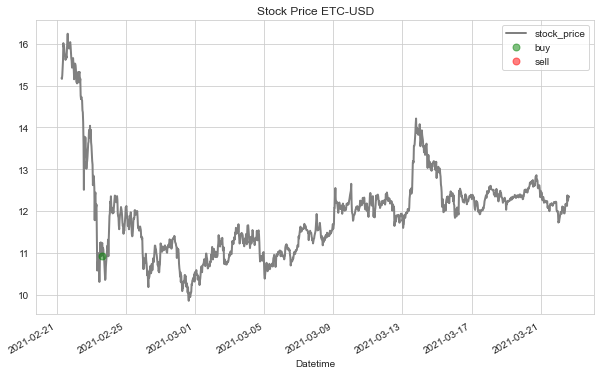

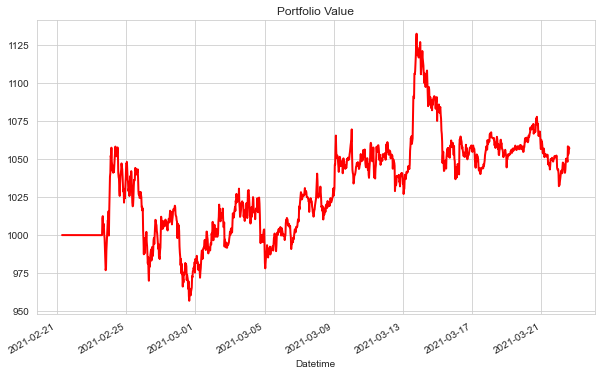

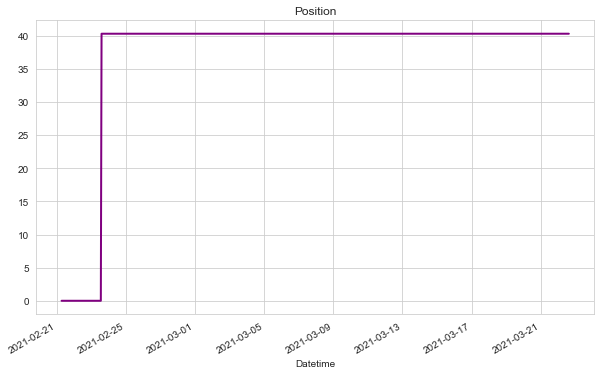

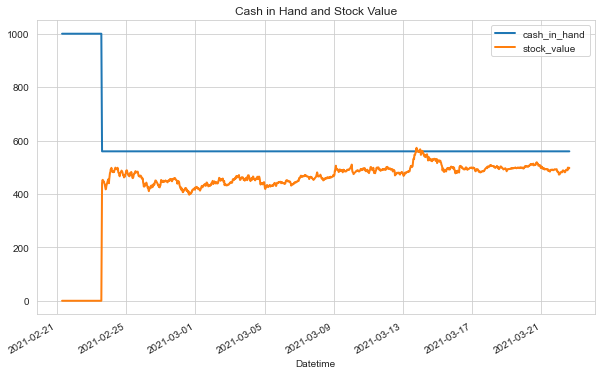

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ETC-USD
Start: 2021-02-21 07:00:00+00:00  End: 2021-03-22 15:00:00+00:00
Compound Annual Growth Rate: 1.03 %
Volatility: 0.0613
shape ratio: -0.0120
Maximun drawdown: -9.58 %
Calmar ratio: 0.1071
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -3.75 %
Volatility (benchmark): 0.1688
shape ratio: -0.2872
Maximun drawdown: -39.33 %
Calmar ratio (benchmark): -0.0953


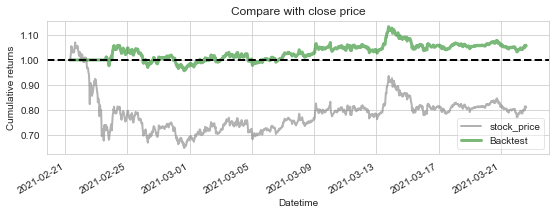

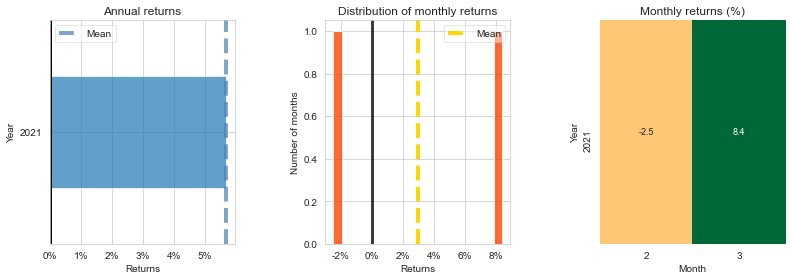

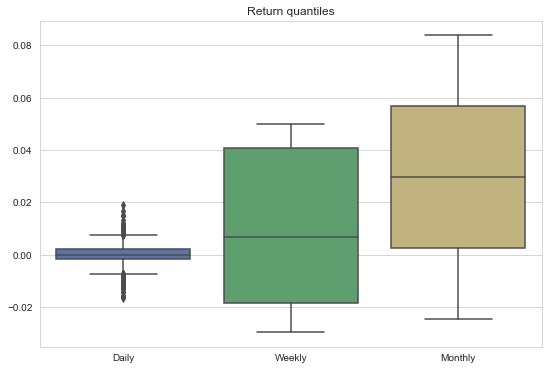

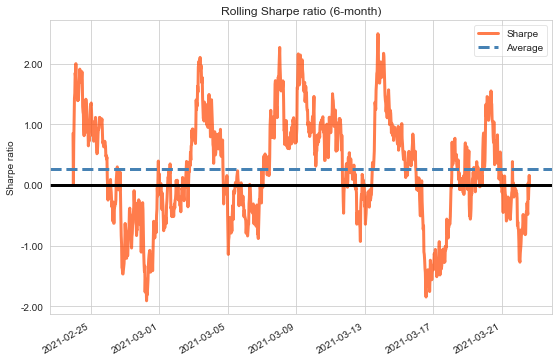

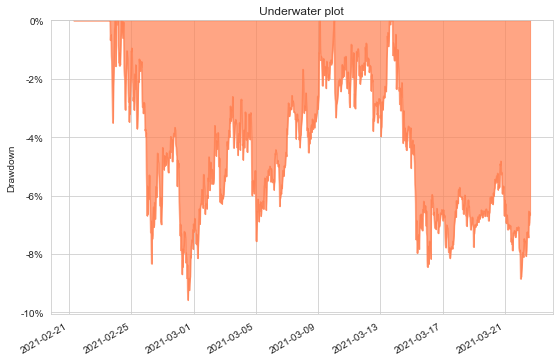

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')